In [1]:
%matplotlib inline

from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from matplotlib import pyplot as plt

# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [2]:
table = html_soup.find('table', class_='table')

In [ ]:
#or

In [3]:
#pandas method
DF = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')

In [4]:
#form dataframe
marsDF = DF[0]

In [48]:
#check to see if dataframe formed
marsDF.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [6]:
#check data
marsDF.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [8]:
#change date to datetime
marsDF["terrestrial_date"] = pd.to_datetime(marsDF["terrestrial_date"])
#check dtypes
marsDF.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [17]:
#6 how many months exist on mars
marsDF["month"].max()
#12 according to the month column

12

In [22]:
#7 how many martian days of data exist
marsDF["sol"].max()
#1977 according to the sol column

1977

In [30]:
#8 coldest and warmest months on mars
avgtemp = marsDF.groupby(["month"]).mean()["min_temp"]
avgtemp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [41]:
#8 coldest month = Month#3
avgtemp.min()
#8 Warmest month = Month#8
avgtemp.max()

-68.38297872340425

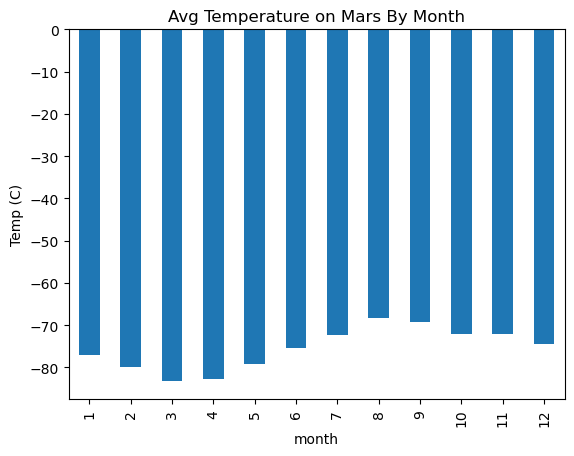

In [43]:
#plotting chart for #8
plt.figure()
avgtemp.plot(kind="bar")
plt.title("Avg Temperature on Mars By Month")
plt.xlabel("month")
plt.ylabel("Temp (C)")
plt.show()

In [45]:
#9 Which months have the lowest and highest pressure
pressure = marsDF.groupby(["month"]).mean()["pressure"]
pressure
#lowest #6
#highest #9

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

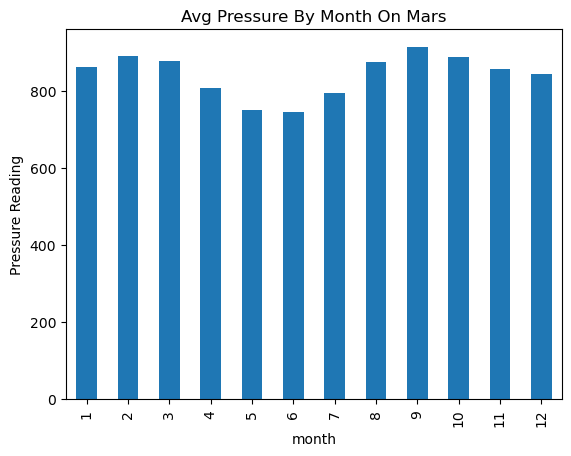

In [47]:
#9 Plotting the chart for Pressure
plt.figure()
pressure.plot(kind="bar")
plt.title("Avg Pressure By Month On Mars")
plt.ylabel("Pressure Reading")
plt.show()

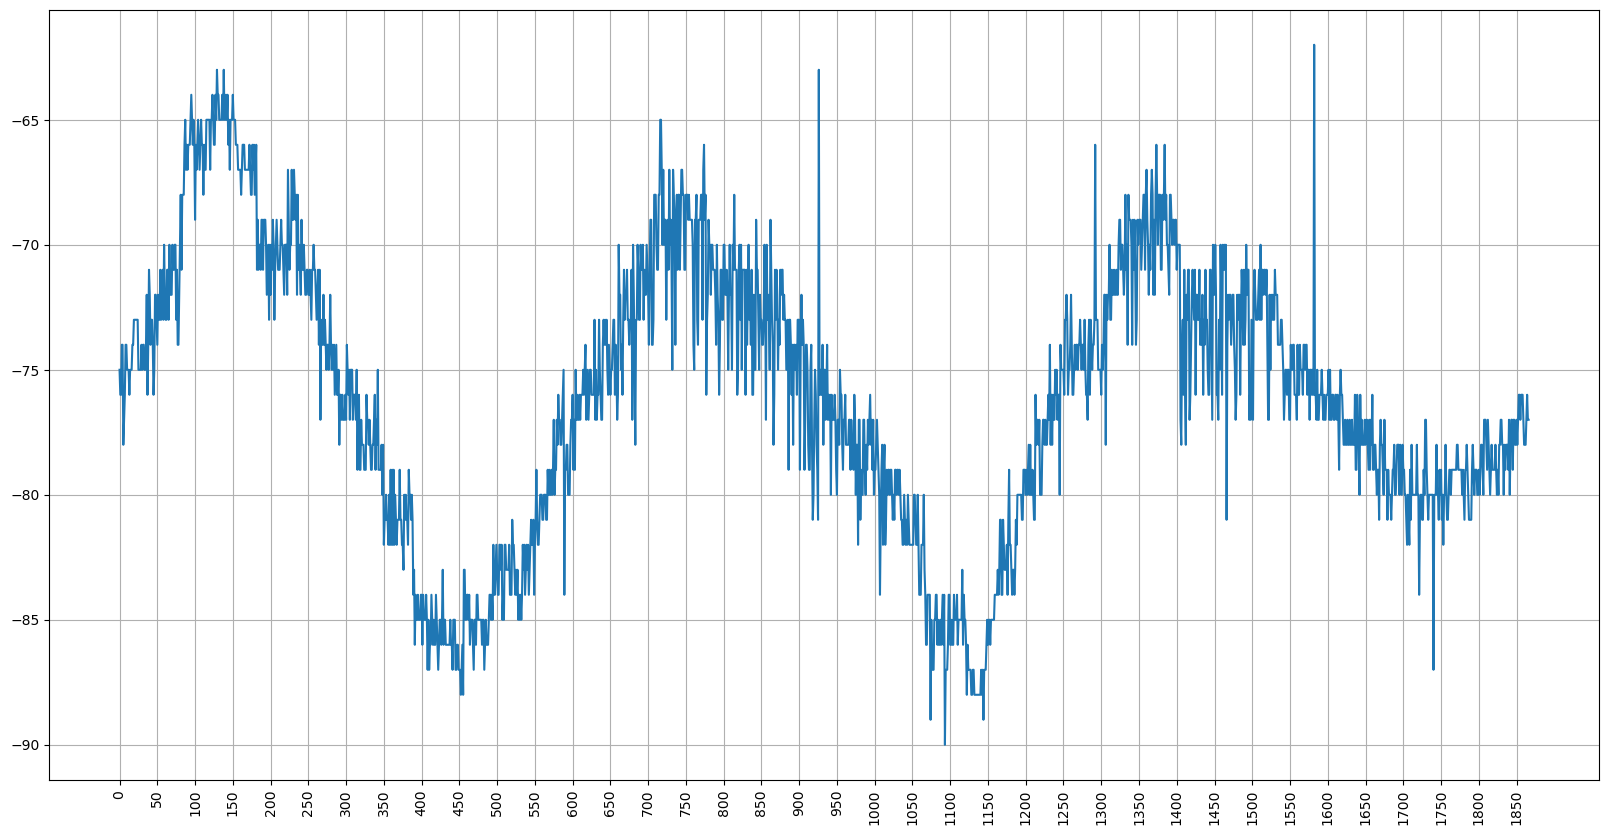

In [74]:
#10 About how many earth days exist in a Martian Year?
import numpy as np
#find final day number
xlimit = len(marsDF)
plt.figure(figsize=(20,10))
marsDF["min_temp"].plot()
plt.grid()
plt.xticks(np.arange(0, xlimit, step= 50),rotation=90)
plt.show()
#visual estimate suggest 625 or more Earth days per Martian year cycle.


In [75]:
#11 export to CSV file
marsDF.to_csv('mars.csv',index=False)